A reinforcement learning environment is basically a simulator or a real world system  designed mainly for to support the model based algorithm to make optimal decisions and Model-based Reinforcement Learning  represents of the environment's dynamics to plan actions. The environment must provide a structure that enables the agent to simulate future outcomes and make informed decisions based on predictions.

In [124]:
import gym
import numpy as np
from gym import spaces 
import matplotlib.pyplot as plt


Grid World:
0 0 0 0 0
1 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 0 0 2
Grid World:
0 0 0 0 0
1 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 0 0 2
Grid World:
1 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 0 0 2
Grid World:
0 1 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 0 0 2
Grid World:
0 0 0 0 0
0 1 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 0 0 2
Grid World:
0 0 0 0 0
0 0 1 0 0
0 0 0 0 0
0 0 0 0 0
0 0 0 0 2
Grid World:
0 0 0 0 0
0 0 0 0 0
0 0 1 0 0
0 0 0 0 0
0 0 0 0 2
Grid World:
0 0 0 0 0
0 0 0 0 0
0 0 0 1 0
0 0 0 0 0
0 0 0 0 2
Grid World:
0 0 0 0 0
0 0 0 0 0
0 0 0 0 1
0 0 0 0 0
0 0 0 0 2
Grid World:
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 0 0 1
0 0 0 0 2
Grid World:
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 0 0 2
Reached the goal!


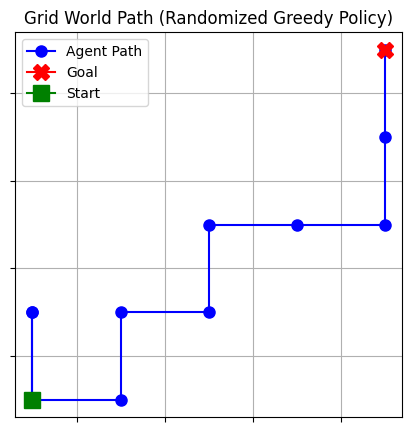

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
import random

class GridWorldEnv(gym.Env):
    def __init__(self, grid_size=(5, 5), goal_position=(4, 4)):
        super(GridWorldEnv, self).__init__()

        # Grid size and goal position
        self.grid_size = grid_size
        self.goal_position = goal_position

        # Action space: 4 actions (up, down, left, right)
        self.action_space = spaces.Discrete(4)

        # Observation space: the grid has (n, n) states
        self.observation_space = spaces.Discrete(grid_size[0] * grid_size[1])

        # Initial state (top-left corner of the grid)
        self.state = (0, 0)

    def reset(self):
        """Reset the environment to the initial state."""
        self.state = (0, 0)
        return self.state

    def step(self, action):
        """Take an action and return the next state, reward, done flag, and additional info."""
        x, y = self.state

        # Perform the action
        if action == 0:  # up
            x = max(0, x - 1)
        elif action == 1:  # down
            x = min(self.grid_size[0] - 1, x + 1)
        elif action == 2:  # left
            y = max(0, y - 1)
        elif action == 3:  # right
            y = min(self.grid_size[1] - 1, y + 1)

        # Update state
        self.state = (x, y)

        # Reward for reaching the goal
        if self.state == self.goal_position:
            return self.state, 1, True, {}

        # Otherwise, penalty for each step taken
        return self.state, -1, False, {}

    def render(self):
        """Render the environment (visualize the grid)."""
        grid = np.zeros(self.grid_size)
        x, y = self.state
        grid[x, y] = 1  # Mark the agent's position
        grid[self.goal_position] = 2  # Mark the goal position

        print("Grid World:")
        for row in grid:
            print(" ".join(str(int(cell)) for cell in row))

# Initialize the environment
env = GridWorldEnv()

# Reset the environment
state = env.reset()

# Store states for plotting
states = [state]

# Simulate the agent using a randomized greedy policy
for _ in range(20):  # Limit the number of steps
    x, y = env.state
    goal_x, goal_y = env.goal_position

    # Greedy actions based on the goal
    actions = []
    if x < goal_x:
        actions.append(1)  # Move down
    if x > goal_x:
        actions.append(0)  # Move up
    if y < goal_y:
        actions.append(3)  # Move right
    if y > goal_y:
        actions.append(2)  # Move left

    # Add some randomness: explore 20% of the time
    if random.random() < 0.8:  # Greedy choice 80% of the time
        action = random.choice(actions)
    else:  # Explore a random action
        action = env.action_space.sample()

    # Take a step in the environment
    next_state, reward, done, _ = env.step(action)
    states.append(next_state)

    # Render the environment's state
    env.render()

    if done:
        print("Reached the goal!")
        break

# Plotting the agent's path on the grid
states = np.array(states)
fig, ax = plt.subplots(figsize=(5, 5))

# Plot grid
ax.set_xticks(np.arange(-0.5, env.grid_size[1], 1))
ax.set_yticks(np.arange(-0.5, env.grid_size[0], 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(which='both')

# Plot agent's path (mark with circles)
ax.plot(states[:, 1], states[:, 0], marker='o', color='blue', linestyle='-', markersize=8, label="Agent Path")

# Plot the goal (target state)
ax.plot(env.goal_position[1], env.goal_position[0], marker='X', color='red', markersize=12, label="Goal")

# Mark start position
ax.plot(0, 0, marker='s', color='green', markersize=12, label="Start")

plt.title("Grid World Path (Randomized Greedy Policy)")
plt.legend()
plt.show()
